In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import exponpow
import math
%matplotlib inline

Экспоненциа́льное (или показа́тельное[1]) распределе́ние — абсолютно непрерывное распределение, моделирующее время между двумя последовательными свершениями одного и того же события.
Случайная величина X имеет экспоненциальное распределение с параметром lambda >0, если её плотность вероятности имеет вид:

\begin{cases}\lambda \,e^{-\lambda x},&x\geq 0,\\0,&x<0.\end{cases}
Пример. Пусть есть магазин, в который время от времени заходят покупатели. При определённых допущениях время между появлениями двух последовательных покупателей будет случайной величиной с экспоненциальным распределением. Среднее время ожидания нового покупателя (см. ниже) равно 1/\lambda . Сам параметр lambda  тогда может быть интерпретирован как среднее число новых покупателей за единицу времени.

### Сгенерируем выборку объёма 1000 экспоненциа́льного (или показа́тельное) распределе́ния(b=1):

In [48]:
b = 1
vals = exponpow.ppf([0.001, 0.5, 0.999], b)
r = exponpow.rvs(b, size=1000)
rv = exponpow(b)

Text(0.5, 0, '$x$')

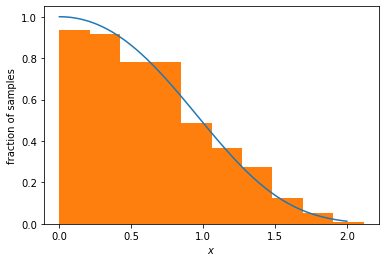

In [53]:
distribution = np.linspace(0, np.minimum(rv.dist.b, 2))
lot = plt.plot(distribution, rv.pdf (distribution))
plt.hist(r, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

## Вычисление теорtтических EX, std, DX  распределения

In [67]:
mean = exponpow.mean(b)
std = exponpow.std(b)
Dx = std**2
print('Mean:', mean,'Std:', std, 'Dx:', Dx)

Mean: 0.5963473623176412 Std: 0.41988164227750907 Dx: 0.17630059352165808


In [72]:
def exponcentr(sizeSamples, Ex, Dx):
    n = sizeSamples
    #генерация выборок
    values = np.array([ exponpow.rvs(1, size=n) for x in range(1000)])
    #вычисление выборочных средних
    meanVal = values.mean(axis = 1)
    plt.hist(meanVal, density=True, alpha=0.5, label='hist mean n ' + str(n))
    
    #мат. ожидание м sigma нормального распределения
    mu = Ex
    sigma = math.sqrt(Dx/n)
    print('мат. ожидание=' , mu)
    print('sigma=' , sigma)
    # зададим нормальное распределенние
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0.5,2,100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, 'r-', lw=3, alpha=0.7, label='pareto pdf n ' + str(n))
    plt.ylabel('samples')
    plt.xlabel('$x$')
    plt.legend(loc='best')

мат. ожидание= 0.5963473623176412
sigma= 0.18777677892735198


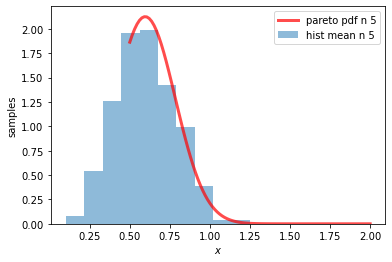

In [81]:
exponcentr(5, mean, Dx)

мат. ожидание= 0.5963473623176412
sigma= 0.13277823372889777


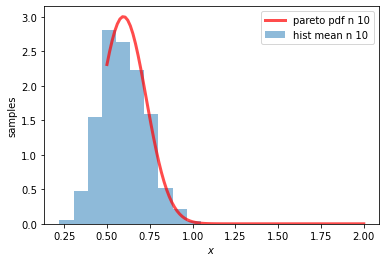

In [80]:
exponcentr(10, mean, Dx)

мат. ожидание= 0.5963473623176412
sigma= 0.059380231310034164


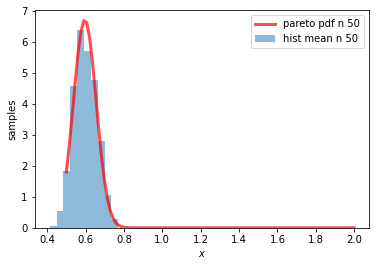

In [82]:
exponcentr(50, mean, Dx)

# Вывод: 
# Распределение выборочных средних для функции exponpow не очень хорошо описывается нормальным распределением.
# С ростом n точность аппроксимации увеличивается, но мешает фактор ограничения справа.